![WordCloud](./img/wordcloud.png)

In [1]:
#hideInput
try:
    username
except NameError:
    username = 'stranger'

print('Hello, ' + username + '!')

Hello, stranger!


# Lernmodul zur Verarbeitung und Analyse von Textdaten

Das Verarbeiten menschlicher Sprache gilt als Voraussetzung für eine erfolgreiche Mensch-Maschine-Kommunikation. Zusätzlich kann sie dabei helfen eine vom Mensch unternommene Textanalyse zu unterstützen. Handelt es sich bei diesem Kommentar um unerwünschte Inhalte? Verbreitet dieser Beitrag Falschinformationen? Und welche Meinung will der Verfasser mit dieser Rezension zum Ausdruck bringen?

Im folgenden Lernmodul wird mithilfe computergestützter Methoden eine Antwort auf solche Problemstellungen gesucht. Im Zuge der Stimmungsanalyse (Sentiment Analysis) wird versucht die Intention eines Textbeitrages zu identifizieren um bspw. zwischen einer negativen und einer positiven Aussage zu unterscheiden. Diese Unterscheidung übernimmt ein Modell (hier: Klassifikator), welches auf Basis eines Vokabulars (hier: Labels) eine Vorhersage (hier: Stimmung) über vorliegende Textbeiträge (hier: Tweets) trifft.

Dabei durchläuft das Lernmodul auf dem Weg von Textbeiträgen als Eingabe hin zu einer Stimmungsvorhersage als Ausgabe die drei Domänen *Daten*, *Modell* und *Verwendung* wie die folgende Abbildung verdeutlicht:

![Pipeline](./img/flow.png)

**Übersicht über die Lerninhalte:**

1. [Einführung](#1.-Einführung)
    1. [Motivation](#1.1-Motivation)
    2. [Voraussetzungen](#1.2-Voraussetzungen)
2. [Daten](#2.-Daten)
    1. [Textdaten beschaffen](#2.1-Textdaten-beschaffen)
    2. [Textdaten erkunden](#2.2-Textdaten-erkunden)
    3. [Textdaten aufbereiten](#2.3-Textdaten-aufbereiten)
        1. [Zeichen bereinigen](#2.3.1-Zeichen-bereinigen)
        2. [Wörter bereinigen](#2.3.2-Wörter-bereinigen)
        3. [Tweets bereinigen](#2.3.3-Tweets-bereinigen)
3. [Modell](#3.-Modell)
    1. [Textdaten einbetten](#3.1-Textdaten-einbetten)
        1. [Vokabular](#3.1.1-Vokabular)
        2. [Vektorisierung](#3.1.2-Vektorisierung)
        3. [Label](#3.1.3-Label)
        4. [Features](#3.1.4-Features)
    2. [Textdaten klassifizieren](#3.2-Textdaten-klassifizieren)
        1. [Überwachte Klassifikation](#3.2.1-Überwachte-Klassifikation)
        2. [Unüberwachte Klassifikation](#3.2.2-Unüberwachte-Klassifikation)
4. [Verwendung](#4.-Verwendung)
    1. [Textdaten vorhersagen](#4.1-Textdaten-vorhersagen)
        1. [Überwachter Klassifikator](#4.1.1-Überwachter-Klassifikator)
        2. [Unüberwachter Klassifikator](#4.1.2-Unüberwachter-Klassifikator)
5. [Abschluss](#5.-Abschluss)

**Lernziele:**

Die Teilnehmer lernen in der [Datendomäne](#daten) Textdaten in roher Form Schritt für Schritt in kontextbezogene Daten für eine Textanalyse zu transformieren. Daraufhin bewegen sich die Teilnehmer in der [Modelldomäne](#modell), in der sie die Daten in das Modell einbetten und mittels zweier unterschiedlicher Algorithmen klassifizieren. Last but not least werden die entstandenen Klassifikatoren in der [Verwendungsdomäne](#verwendung) für eine Vorhersage der Stimmung gebraucht.

**Voraussetzungen:**

- [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas)

**Setup für die Aufgabenüberprüfung:**

In [2]:
#hideInput
from taskreview.learning_module import LearningModule
texte_lm = LearningModule('data/lernmodul_texte.db')
texte_lm

<div style="background-color: #150458; padding: 5px;"></div>

## 1. Einführung

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

### 1.1 Motivation

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit ähnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, während der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von Bild- auf Textdaten, lässt sich das Forschungsfeld des _NLP_ auf ähnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgeführt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analysis)
* Textmanipulation (Text Augmentation)
  * Maschinelle Übersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Dieses Lernmodul beschäftigt sich mit der ersten Problemstellung, also der Texterkennung, im besonderen mit der Unterscheidung verschiedener Stimmungen, welche der Verfasser eines Textes gehabt haben könnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten sind und erkannt werden müssen. Auch könnte man ein Stimmungsbild der Gesellschaft über die Auswertung von Beiträgen auf Twitter betrachten.

### 1.2 Voraussetzungen

Dieses Lernmodul nimmt sich [NumPy](https://numpy.org/) für numerische Berechnungen, [Pandas](https://pandas.pydata.org/) zur Datenverarbeitung und [PyPlot](https://matplotlib.org/api/pyplot_api.html) zur Datenvisualisierung zur Hilfe.

In [3]:
import numpy as np
import pandas as pd

Dazu werden die folgenden Skripte zum Einlesen & Visualisieren der Daten benötigt:

In [4]:
from utils import data_functions as df
from utils import model_functions as mf
from utils import vis_functions as vf

<div style="background-color: #150458; padding: 5px;"></div>

## 2. Daten

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

In der Datendomäne beschaffen wir uns zunächst einen Datensatz, welcher aus vielen Beispielen besteht, der die Grundgesamtheit an Daten bildet. Ein Beispiel umfasst dabei mindestens ein, wenn nicht sogar mehrere Merkmale. Ein Merkmal wird dabei durch einen numerischen oder symbolischen Wert verkörpert, der in unserem Fall bspw. ein Text sein kann. Im weiteren Verlauf werden die beschafften Daten begutachtet und bereinigt.

Welche Schritte ein Textbeitrag in der Datendomäne durchläuft verdeutlicht die folgende Abbildung:

![Daten](./img/data_flow.png)

### 2.1 Textdaten beschaffen

Wo findet man in der heutigen Zeit aktuelle Daten, welche eine eigene Meinung enthalten? Auf dem Kurznachrichtendienst Twitter. Da aktuelle Daten von Twitter nicht automatisch mit deskriptiven Daten angereichert werden, benötigt ihre Analyse einen gewissen Mehraufwand. Überwachtes Lernen auf einem aufbereiteten Datensatz aus bekannter Ein- und Ausgabe ist in unserem Fall erstmal so nicht möglich, da wir es mit aktuellen Daten zu tun haben, die erst aufbereitet werden müssen.

Unser Datensatz wird ungefiltert von Twitter extrahiert und monatlich unter der [CC 4.0 International](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz veröffentlicht [[1]](#1).

Unter `data/tweets/` finden sich ein Teil dieser Veröffentlichung als JSON, welche wir zunächst als Rohdateien in `twitter` einlesen...

In [5]:
twitter = df.load_json()

...sie daraufhin in einen DataFrame abbilden...

In [6]:
twitter = map(pd.DataFrame, twitter)

...und diese letztendlich zu einem großen Datensatz zusammenfügen.

In [7]:
twitter = pd.concat(twitter, copy=False)

Das war's auch schon mit der Bereitstellung der Daten. Als nächstes gilt es die noch unbekannten Daten zu erkunden.

### 2.2 Textdaten erkunden

Wie im [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas) kennengelernt, lässt sich über die `head()` Funktionalität der Kopf des Datensatzes betrachten. Wie schaut dieser aus?

In [8]:
twitter.head()

,twista,type,id,user,created_at,recorded_at,source,retweets,favourites,lang,...,screen_name,location,description,url,verified,followers,friends,listed,statuses,refers_to
0,0.3.4b1,status,1233850617996726274,759488216,2020-02-29T20:24:45+00:00,2020-02-29T20:24:59.835143+00:00,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3.4b1,status,1233364221188026370,114508061,2020-02-28T12:11:59+00:00,2020-03-01T11:09:17.015566+00:00,"<a href=""http://www.sueddeutsche.de/"" rel=""nof...",51.0,145,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3.4b1,status,1233850617870913541,2902622080,2020-02-29T20:24:45+00:00,2020-02-29T20:24:59.839449+00:00,"<a href=""http://www.playstation.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3.4b1,status,1233701038483542016,140410244,2020-02-29T10:30:23+00:00,2020-02-29T20:24:59.842019+00:00,"<a href=""https://about.twitter.com/products/tw...",3.0,8,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.3.4b1,status,1233837417959952385,2335677408,2020-02-29T19:32:18+00:00,2020-03-01T11:42:05.807013+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",509.0,1773,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Leider liefert die `head()` Funktionalität nicht die Größe des Datensatzes zurück...

**Aufgabe: Wie viele Beispiele sind im `twitter` Datensatz enthalten?**

In [9]:
#hideInput
texte_lm.show_task(221)

Output()

Output()

Output()

In [10]:
#solution
twitter.shape[0]

450004

**Aufgabe: Wie viele Werte liegen pro Beispiel vor? Aus wie vielen Merkmalen besteht der `twitter` Datensatz?**

In [11]:
#hideInput
texte_lm.show_task(222)

Output()

Output()

Output()

In [12]:
#solution
twitter.shape[1]

26

Und welche Merkmale liegen genau vor?

In [13]:
twitter.columns

Index(['twista', 'type', 'id', 'user', 'created_at', 'recorded_at', 'source',
       'retweets', 'favourites', 'lang', 'hashtags', 'urls', 'mentions',
       'mentioned_ids', 'text', 'name', 'screen_name', 'location',
       'description', 'url', 'verified', 'followers', 'friends', 'listed',
       'statuses', 'refers_to'],
      dtype='object')

Das Merkmal _created_ _at_ scheint den Zeitpunkt des Tweets zu beinhalten. Welche Jahre haben wir erwischt?

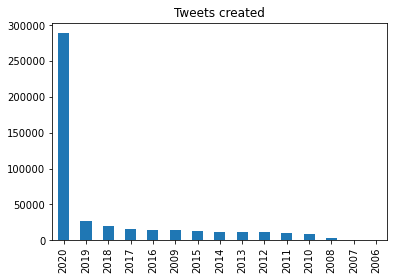

In [14]:
twitter['year'] = pd.to_datetime(twitter['created_at']).dt.year
twitter.drop(['created_at', 'recorded_at'], axis=1, inplace=True)
twitter['year'].value_counts().plot(kind='bar', title='Tweets created')

Anscheinend enthält unser Datensatz veraltete Tweets, obwohl wir explizit mit aktuellen Textbeiträgen arbeiten wollen. Wir konzentrieren uns also auf das Jahr 2020 und verwerfen ältere Tweets wie folgt:

In [15]:
twitter = twitter.loc[twitter['year'] == 2020]

Das Merkmal _lang_ schauen wir uns als nächstes an. Welche Sprachen sind vertreten?

In [16]:
twitter['lang'].unique()

array(['de', 'en', 'pt', 'in', 'es', 'it', 'fr', 'und', 'tr', 'ca', 'da',
       'sl', 'pl', 'hi', 'nl', 'no', 'el', 'ru', 'fa', 'sv', 'et', 'cy',
       'ro', 'tl', 'ja', 'ar', 'ht', 'th', 'fi', 'ko', 'vi', 'zh', 'is',
       'hu', nan, 'cs', 'eu', 'lt', 'iw', 'ur', 'kn', 'lv'], dtype=object)

Anscheinend enthält unser Datensatz verschiedenste Sprachen. Da unser Modell lediglich deutsche Inhalte klassifizieren soll, verwerfen wir nicht-deutsche Inhalte wie folgt:

In [17]:
twitter = twitter.loc[twitter['lang'] == 'de']

Als nächstes konzentrieren wir uns auf die gewünschten Textbeiträge. Das Merkmal _text_ scheint die jeweiligen Tweets zu enthalten. Wir extrahieren dieses Merkmal vom DataFrame `twitter` in eine DataSeries `tweets`.

In [18]:
tweets = twitter['text']
del twitter
tweets.head()

0    a) Venezuela 2019\nb) Deutschland während nCov...
1    Assad und Putin wollen Erdoğan eine Lektion er...
2    Ich hoff die Dinger kann ich a amol fahren und...
3    Trotz aussichtsloser Lage der Wehrmacht ergebe...
4    Mein Kommentar zur Causa Hopp für @derspiegel....
Name: text, dtype: object

Beim Extrahieren der Tweets werden ausnahmslos alle Beispiele berücksichtigt. Das gilt auch für fehlende Merkmale, die in der Menge an Beispielen untergegangen sind. Sind unsere Daten nun bereit zur Aufbereitung?

**Aufgabe: Wie viele Werte fehlen im `tweets` Datensatz?**

In [19]:
#hideInput
texte_lm.show_task(223)

Output()

Output()

Output()

In [20]:
#solution
tweets.isna().sum()

103453

Fehlende Werte können von den folgenden Schritten nicht verarbeitet werden, sodass wir sie entfernen müssen.

In [21]:
tweets.dropna(inplace=True)

Der Übersicht halber fügen wir ein frei erfundenes Beispiel an, um die folgenden Verarbeitungsschritte besser nachvollziehen zu können. Unser ausgedachter Tweet lautet wie folgt:

> ⚠️ Dieser Tweet enthält viele unnütze Zeichen 😟 die wir lieber verwerfen. 
> 
> Das wurde uns von @user unter https://example.org verraten #danke

In [22]:
example = '⚠️ Dieser Tweet enthält viele unnütze Zeichen 😟 die wir lieber verwerfen. \n Das wurde uns von @user unter https://example.org verraten #danke'
tweets = tweets.append(pd.Series(example), ignore_index=True)

Das war's auch schon mit der Erkundung der Daten. Bis jetzt haben wir lediglich einzelne Beispiele verworfen, nicht aber vorhandene Beispiele verändert. Bevor das passiert, behalten wir lieber eine Kopie, auf die wir im späteren Verlauf des Lernmoduls noch zurückgreifen werden.

In [23]:
tweets_copy = tweets.copy()

**Aufgabe: Wozu kann eine solche Kopie gut sein?**

In [24]:
#hideInput
texte_lm.show_task(224)

Output()

Output()

Output()

### 2.3 Textdaten aufbereiten

Innerhalb der Datenaufbereitung werden wir jeden Tweet anhand seiner Bestandteile (Zeichen, Wörter, Länge) verarbeiten.

#### 2.3.1 Zeichen bereinigen

Schauen wir uns unser angefügtes Beispiel an...

**Aufgabe: Mit welchem Befehl kommen wir zum letzten Tweet im `tweets` Datensatz?**

In [25]:
#hideInput
texte_lm.show_task(231)

Output()

Output()

Output()

In [26]:
#solution
tweets.iloc[-1]

'⚠️ Dieser Tweet enthält viele unnütze Zeichen 😟 die wir lieber verwerfen. \n Das wurde uns von @user unter https://example.org verraten #danke'

Eigentlich wollen wir aber zum letzten Tweet, den wir am Ende des vorherigen Abschnittes angefügt haben.

Leider enthalten Tweets allerhand Symbole, die wir gesondert behandeln müssen...

**Aufgabe: Welche Elemente befinden sich letzten Tweet, die wir gesondert verarbeiten müssen?**

In [27]:
#hideInput
texte_lm.show_task(232)

Output()

Output()

Output()

Fangen wir mit den Emojis an...

In [28]:
tweets = df.process_emojis(tweets)    
tweets.iloc[-1]

'⚠️ Dieser Tweet enthält viele unnütze Zeichen schlecht die wir lieber verwerfen. \n Das wurde uns von @user unter https://example.org verraten #danke'

**Aufgabe: Was passiert mit Emojis in der `process_emojis()` Funktion?**

In [29]:
#hideInput
texte_lm.show_task(233)

Output()

Output()

Output()

Nun können wir spezielle Zeichenketten, wie die Nutzer-Erwähnung _@user_ und die URL _https://example.org_ verarbeiten.

In [30]:
tweets = df.process_strings(tweets)    
tweets.iloc[-1]

'⚠️ Dieser Tweet enthält viele unnütze Zeichen schlecht die wir lieber verwerfen.  Das wurde uns von  unter  verraten #danke'

**Aufgabe: Was passiert mit Zeichenketten in der `process_strings()` Funktion?**

In [31]:
#hideInput
texte_lm.show_task(234)

Output()

Output()

Output()

Als letztes kümmern wir uns um die Symbole.

In [32]:
tweets = df.process_symbols(tweets)
tweets.iloc[-1]

' Dieser Tweet enthält viele unnütze Zeichen schlecht die wir lieber verwerfen  Das wurde uns von  unter  verraten danke'

**Aufgabe: Was passiert mit Symbolen in der `process_symbols()` Funktion?**

In [33]:
#hideInput
texte_lm.show_task(235)

Output()

Output()

Output()

**Aufgabe: Was passiert mit Symbolen in der `process_symbols()` Funktion?**

#### 2.3.2 Wörter bereinigen

Da unsere Bereinigung im vorherigen Abschnitt nur noch einzelne Wörter und keine Symbole mehr übrig gelassen hat, können wir nun jeden Tweet in seine Bestandteile zerlegen. Dafür zerteilen wir die Zeichenkette anhand des Leerzeichens und erhalten eine Liste von Wörtern in einem Tweet. Dieser Schritt geht mit der Funktionsweise eines [Tokenizer](https://de.wikipedia.org/wiki/Tokenizer) einher, welcher lediglich den kompletten Tweet in einzelne Token, also Wörter, zerteilt.

In [34]:
tweets = tweets.str.lower().str.split()
tweets.iloc[-1]

['dieser',
 'tweet',
 'enthält',
 'viele',
 'unnütze',
 'zeichen',
 'schlecht',
 'die',
 'wir',
 'lieber',
 'verwerfen',
 'das',
 'wurde',
 'uns',
 'von',
 'unter',
 'verraten',
 'danke']

Aus Analysegründen fassen wir alle Wörter zu einer großen Sammlung zusammen, was die `aggregate_words()` Funktion wie folgt umsetzt:

In [35]:
def aggregate_words(tweets):
    """Aggregate words from tweets"""
    
    all_words = []
    for sentence in tweets:
        for word in sentence:
            all_words.append(word)
            
    return all_words

In [36]:
all_words = aggregate_words(tweets)

**Aufgabe: Eine Sammlung aller Wörter findet sich in der `all_words` Liste. Wie viele verschiedene Wörter sind getweetet worden?**

In [37]:
#hideInput
texte_lm.show_task(236)

Output()

Output()

Output()

In [38]:
#solution
len(pd.Series(all_words).unique())

234030

Nachdem wir alle Wörter gesammelt haben, interessieren uns die beliebtesten Wörter aus den Tweets. An dieser Stelle greifen wir auf das Natural Language Toolkit ([NLTK](https://www.nltk.org/)) zurück, welches eine Häufigkeitsverteilung über die `FreqDist()` Funktion wie folgt implementiert.

In [39]:
from nltk.probability import FreqDist
fd = FreqDist(all_words)

**Aufgabe: Wie lauten nach der `fd` Verteilung die drei häufigsten Wörter?**

In [40]:
#hideInput
texte_lm.show_task(237)

Output()

Output()

Output()

In [41]:
#solution
fd.most_common(3)

[('die', 62102), ('und', 53780), ('der', 45439)]

Es ist nicht überraschend, dass sich Artikel, Pronomen oder Konjunktionen als die am häufigsten verwendeten Wörter entpuppen. Schauen wir uns die Häufigkeitsverteilung der 20 beliebtesten Wörter an.

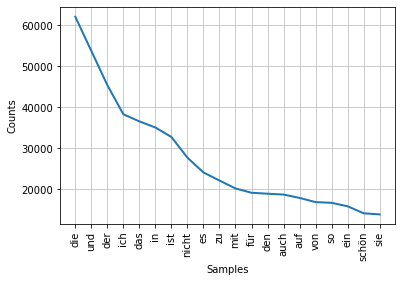

In [42]:
fd.plot(20)

Auch hier scheinen Artikel, Pronomen und Konjunktionen stark vertreten zu sein. Das bringt uns zu der Frage, welche Stimmung diese Wörter eigentlich implizieren?

Solche Wörter, werden im Kontext des NLP als Stoppwörter bezeichnet, da sie zu einer Aussage keinen Inhalt beisteuern, wie es bspw. ein wertendes Adjektiv, wie _gut_ oder _schlecht_ tun würde. Stoppwörter lassen sich daher ähnlich wie das Rauschen aus einer Nachricht (hier: Tweet) entfernen, ohne dass der Inhalt (hier: Stimmung) dieser Nachricht verloren geht.

Wir werden also im folgenden Schritt alle Stoppwörter entfernen. Um sie zu identifizieren, benutzen wir die vorgegebene Textdatei `stop_words.txt` und importieren sie in eine Liste `stop_words`. Hätte man lediglich die meist genutzten Wörter aus der Häufigkeitsverteilung oben genommen, wäre man Gefahr gelaufen, relevante Wörter, wie _schön_, ebenfalls zu entfernen.

In [43]:
stop_words = df.load_stop_words()
stop_words.Wort.values

array(['der', 'die', 'das', 'ein', 'eine', 'einer', 'einen', 'ich', 'du',
       'er', 'sie', 'es', 'wir', 'ihr', 'sie', 'bin', 'bist', 'ist',
       'sind', 'seid', 'und', 'oder', 'doch', 'aber', 'an', 'am', 'in',
       'von', 'vor'], dtype=object)

Bevor wir alle Stoppwörter unwiederruflich entfernen, fragen wir uns erst einmal, wie viel Prozent unseres Datensatzes wir dadurch verlieren würden? Dies lässt sich über die `content_loss()` Funktion wie folgt berechnen.

In [44]:
def content_loss(text): # Execution time too long
    stop_words_list = stop_words['Wort'].values.tolist()
    content = [word for word in text if word not in stop_words_list]
    return 1.0 - len(content) / len(text)

In [45]:
content_loss(all_words)

0.18122912093200094

Um die Stoppwörter endgültig aus unseren Tweets zu entfernen, werfen wir die `filter_tokens()` Funktion wie folgt an.

In [46]:
def filter_tokens(tweets):
    """Filter tokens in tweets"""
    
    row_list = []
    stop_words_list = stop_words['Wort'].values.tolist()  
    for row in tweets:
        
        token_list = []
        for token in row:
            
            if token not in stop_words_list:
                if len(token) > 1:
                    token_list.append(token)
                    
        row_list.append(token_list)
    
    return pd.Series(row_list)

In [47]:
tweets = filter_tokens(tweets) # Python list
tweets.head()

0    [venezuela, deutschland, während, ncovc, nk, i...
1    [assad, putin, wollen, erdoan, lektion, erteil...
2    [hoff, dinger, kann, amol, fahren, können, meh...
3    [trotz, aussichtsloser, lage, wehrmacht, ergeb...
4             [mein, kommentar, zur, causa, hopp, für]
dtype: object

Damit ist unsere Sammlung von Wörter nicht mehr aktuell. Der Einfachheit halber sammeln wir sie erneut über die `aggregate_words()` Funktion.

In [48]:
all_words = aggregate_words(tweets)

Welche Wörter werden wohl mit Ausnahme der Stoppwörter am häufigsten benutzt? Alternativ zur bereits bekannten Häufigkeitsverteilung lassen sich im Kontext des NLP sog. Schlagwortwolken erstellen. Dazu nutzen wir die `WordCloud()` Funktion wie folgt.

In [49]:
from wordcloud import WordCloud
wc = WordCloud()

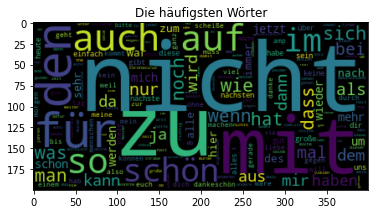

In [50]:
most_common_words = wc.generate_from_frequencies(FreqDist(all_words))
vf.plot_image(most_common_words, 'Die häufigsten Wörter')

#### 2.3.3 Tweets bereinigen

Da uns der vergangene Abschnitt einige Wörter gekostet hat, wollen wir nun die Tweets identifizieren, die zu wenig oder vielleicht sogar zu viele Wörter enthalten. Beide Extrema sind für die weiterführende Analyse nicht zu gebrauchen. Daher berechnen wir im folgenden die Länge eines Tweets.

In [51]:
tweets_length = [len(tweet) for tweet in tweets]

**Aufgabe: Wie viele Wörter besitzt der kürzeste Tweet im `tweets` Datensatz?**

In [52]:
#hideInput
texte_lm.show_task(238)

Output()

Output()

Output()

In [53]:
#solution
np.min(tweets_length)

0

Hoffentlich handelt es sich um einen Ausreißer. Das verifizieren wir wiederum mit einer Häufigkeitsverteilung. Dieses Mal aber als einfaches Histogramm über die `plot_tweet_length_distribution()` Funktion wie folgt.

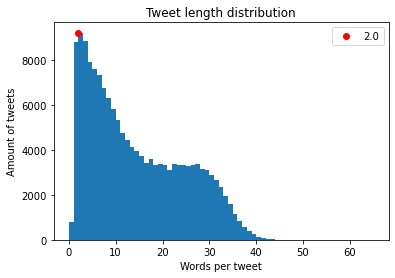

In [54]:
vf.plot_tweet_length_distribution(tweets_length)

Die meisten Tweets scheinen nach Entfernen der Stoppwörter nur noch wenige Wörter lang zu sein. Wir verwerfen alle Tweets, die unterhalb des Maxima aus dem vorherigen Diagramm liegen wie folgt:

In [55]:
min_words_per_tweet = 3
tweets = tweets[tweets.map(len) > min_words_per_tweet]

Das war's auch schon mit der Datenaufbereitung...

**Aufgabe: Wie viel Prozent bleiben nach Bereinigung von Zeichen, Wörtern und zu kurz geratenen Tweets im Vergleich zum ursprünglichen `tweets` Datensatz übrig?**

In [56]:
#hideInput
texte_lm.show_task(239)

Output()

Output()

Output()

In [57]:
#solution
tweets.size / tweets_copy.size

0.8239512415694916

Mit dem bereinigten Datensatz geht es nun weiter in die Modelldomäne, in der wir uns erstmal um die Überführung der Daten in das Modell kümmern.

## 3. Modell

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

In der Modelldomäne betten wir die bereinigten Daten zunächst auf Basis eines Vokabulars in ein Modell ein. Das Vokabular dient dabei als Look-up (LUT) für einen Tweet. Welche weiteren Schritte ein Tweet in der Modelldomäne durchläuft, bevor er die letztendlich klassifiziert wird, verrät die folgende Abbildung:

![Model](./img/model_flow.png)

### 3.1 Textdaten einbetten

Da unsere bereinigten Daten weiterhin in symbolischer Form vorliegen, benötigen wir als nächchstes eine Überführung der Daten in eine Form, die von unserem finalen Modell (hier: Klassifikator) verstanden wird. Man spricht in diesem Zusammenhang vom [Embedding](https://en.wikipedia.org/wiki/Word_embedding) der Wörter.

Es gibt viele komplizierte Verfahren, um das symbolische Wort auf einen numerischen Wert abzubilden, welche in diesem Lernmodul nicht näher betrachtet werden sollen. In diesem Fall schlagen wir die Wörter einfach in einer Art Vokabular nach, das für jedes Wort einen eigenen Wert besitzt. Wie sieht unser Vokabular nun aus?

#### 3.1.1 Vokabular

Unser Vokabular wurde über die Universität Leipzig unter der [CC BY-NC-SA 3.0 DE](https://creativecommons.org/licenses/by-nc-sa/3.0/de/) Lizenz veröffentlicht [[2]](#2).

Das Vokabular besteht aus negativ bzw. positiv annotierten Wörtern der deutschen Sprache. Die Stimmungslage ist im Intervall von `[-1, 1]` bzw. `['negativ', 'positiv']` begrenzt. Schlagen wir neutrale Wörter, wie _und_ bzw. _oder_ im Vokabular nach, bekommen wir einen Stimmungswert von _0_, also neutral, zurückgegeben. Unser Modell interessiert sich aber lediglich für die zwei Extrema und soll als binärer Klassifikator zwischen negativen und posiven Tweets differenzieren. 

Wir vergeben die Labels wie folgt:

In [58]:
labels = ['negativ', 'positiv']

Zunächst holen wir uns die negativen Wörter für das Vokabular wie folgt:

In [59]:
negative = df.load_vocabulary(labels[0]) # Negative
negative.head()

,Wort,Wert,Deklination,Stimmung
0,Abbruch|NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen\r",negativ
1,Abdankung|NN,-0.0048,Abdankungen\r,negativ
2,Abdämpfung|NN,-0.0048,Abdämpfungen\r,negativ
3,Abfall|NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen\r",negativ
4,Abfuhr|NN,-0.3367,Abfuhren\r,negativ


Es folgen die positiven Wörter des Vokabulars.

In [60]:
positive = df.load_vocabulary(labels[1]) # Positive
positive.head()

,Wort,Wert,Deklination,Stimmung
0,Abschluß|NN,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen\r",positiv
1,Abstimmung|NN,0.004,Abstimmungen\r,positiv
2,Agilität|NN,0.004,NaN,positiv
3,Aktivität|NN,0.004,Aktivitäten\r,positiv
4,Aktualisierung|NN,0.004,Aktualisierungen\r,positiv


Der Spalte _Wort_ scheint der Typ des Wortes angehängt zu sein. Wir führen das negative und das positive Vokabular im DataFrame `vocab` zusammen...

In [61]:
vocab = pd.concat([negative, positive])
assert positive.size + negative.size == vocab.size
del negative, positive

...und kümmern uns um ein paar Verschönerungen über die `format_vocab()` Funktion. Dabei werden insbesondere alle Deklinationen in eine eigene Reihe überführt und mit ihrem Stammwort versehen.

In [62]:
vocab = df.format_vocabulary(vocab)
vocab.head()

,Stamm,Wert,Stimmung,Typ,Wort
0,Abbruch,-0.0048,negativ,NN,Abbruch
1,Abbruch,-0.0048,negativ,NN,Abbruches
2,Abbruch,-0.0048,negativ,NN,Abbrüche
3,Abbruch,-0.0048,negativ,NN,Abbruchs
4,Abbruch,-0.0048,negativ,NN,Abbrüchen


Nun haben wir ein vollständig bereinigtes Vokabular...

**Aufgabe: Welche Wort-Typen sind im `vocab` Vokabular vorhanden?**

In [63]:
#hideInput
texte_lm.show_task(311)

Output()

Output()

Output()

In [64]:
#solution
vocab['Typ'].unique()

array(['NN', 'VVINF', 'ADJX', 'ADV'], dtype=object)

Wir visualisieren alle negativen Nomen mithilfe der bereits bekannten Schlagwortwolke:

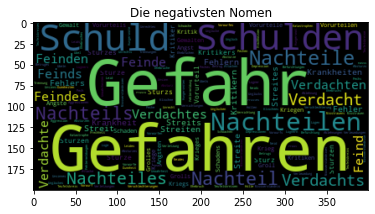

In [65]:
neg_nouns = vocab[(vocab['Stimmung'] == 'negativ') & (vocab['Typ'] == 'NN')] # Only negative vocabulary
most_neg_nouns = wc.generate_from_frequencies(pd.Series(neg_nouns.Wert.values * (-100), index=neg_nouns.Wort).to_dict())
vf.plot_image(most_neg_nouns, 'Die negativsten Nomen')

Analog visualisieren wir alle positiven Adjektive in unserem Vokabular.

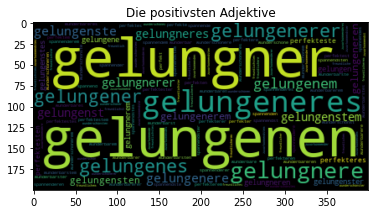

In [66]:
pos_adj = vocab[(vocab['Stimmung'] == 'positiv') & (vocab['Typ'] == 'ADJX')] # Only positive vocabulary
most_pos_adj = wc.generate_from_frequencies(pd.Series(pos_adj.Wert.values * (100), index=pos_adj.Wort).to_dict())
vf.plot_image(most_pos_adj, 'Die positivsten Adjektive')

**Aufgabe: Fällt das `vocab` Vokabular eher negativ oder eher positiv aus?**

In [67]:
#hideInput
texte_lm.show_task(312)

Output()

Output()

Output()

In [68]:
#solution
vocab.mean()

Wert   -0.04533
dtype: float64

Wie bereits für die Tweets halten wir nach fehlenden Werten Ausschau...

**Aufgabe: In welcher Spalte des `vocab` Vokabulars fehlen Werte?**

In [69]:
#hideInput
texte_lm.show_task(313)

Output()

Output()

Output()

In [70]:
#solution
vocab.isna().describe()

,Stamm,Wert,Stimmung,Typ,Wort
count,31274,31274,31274,31274,31274
unique,1,1,1,1,2
top,False,False,False,False,False
freq,31274,31274,31274,31274,30467


Anstatt sie zu streichen, werden sie mit einer leeren Zeichenkette ersetzt. Dies verhindert, dass unser Vokabular schrumpft, was wir unbedingt verhindern wollen, da unser Modell auf Basis des Vokabulars erzeugt wird.

In [71]:
vocab.fillna('', inplace=True)

**Aufgabe: Welchen Stimmungswert besitzt das Adjektiv _gut_ im `vocab` Vokabular?**

In [72]:
#hideInput
texte_lm.show_task(314)

Output()

Output()

Output()

In [73]:
#solution
vocab.loc[(vocab['Typ'] == 'ADJX') & (vocab['Wort'] == 'gut')]

,Stamm,Wert,Stimmung,Typ,Wort
13353,gut,0.3716,positiv,ADJX,gut


**Aufgabe: Wie lautet das "schlechteste", also das am schlechtesten annotierte Wort im `vocab` Vokabular?**

In [74]:
#hideInput
texte_lm.show_task(315)

Output()

Output()

Output()

In [75]:
#solution
vocab.sort_values('Wert').head(10)

,Stamm,Wert,Stimmung,Typ,Wort
1021,Gefahr,-1.0000,negativ,NN,Gefahr
1022,Gefahr,-1.0000,negativ,NN,Gefahren
2017,Schuld,-0.9686,negativ,NN,Schulden
2016,Schuld,-0.9686,negativ,NN,Schuld
25825,unnötig,-0.9463,negativ,ADJX,unnötigsten
25810,unnötig,-0.9463,negativ,ADJX,unnötigstes
25811,unnötig,-0.9463,negativ,ADJX,unnötigere
25812,unnötig,-0.9463,negativ,ADJX,unnötige
25813,unnötig,-0.9463,negativ,ADJX,unnötigeren
25814,unnötig,-0.9463,negativ,ADJX,unnötigen


Unser Vokabular ist fertig. Als nächstes richten wir den Fokus wieder auf unsere Tweets.

#### 3.1.2 Vektorisierung

Innerhalb der Vektorisierung überführen wir die symbolischen Textbeiträge in numerische Werte. Dies geschieht im Normalfall über Häufigkeitsverteilungen. Je öfter ein Wort im Text vorkommt, desto wichtiger scheint es zu sein, was sich in der Vektorisierung wiederspiegelt.

In diesem Fall aber benutzen wir das bekannte Vokabular und überführen jedes einzelne Wort eines Tweets in seinen Stimmungswert. Das Wort _gut_ kriegt dabei den Stimmungswert 0.37 zugewiesen, wie bereits in einer der vorherigen Aufgaben behandelt wurde.

In [76]:
vocab.loc[vocab['Wort'] == 'gut'].Wert

13353    0.3716
Name: Wert, dtype: float64

Für eine performante Vektorisierung benötigen wir einen Look-up-table aus den Schlüssel-/Wertpaaren `{ Wort : Stimmungswert }`.

In [77]:
lookup = pd.Series(vocab.Wert.values, index=vocab.Wort.str.lower()).to_dict()

Die Vektorisierung wird nun über die `vectorize()` Funktion abgeschlossen.

In [78]:
def vectorize(tweet):
    """Vectorize tweets based on vocabulary"""
    
    return [lookup.get(a) for a in tweet if lookup.get(a)]

In [79]:
tweets = tweets.to_frame(name='Token')
tweets['Vector'] = tweets['Token'].apply(vectorize)
tweets.head()

,Token,Vector
0,"[venezuela, deutschland, während, ncovc, nk, i...",[]
1,"[assad, putin, wollen, erdoan, lektion, erteil...","[-0.0048, -0.0468, -0.0603, -0.1483, -0.0048]"
2,"[hoff, dinger, kann, amol, fahren, können, meh...",[0.2318]
3,"[trotz, aussichtsloser, lage, wehrmacht, ergeb...","[-0.0048, -0.183]"
4,"[mein, kommentar, zur, causa, hopp, für]",[]


#### 3.1.3 Label

Dieser Schritt fügt den Tweets eine Stimmung auf Basis der vektorisierten Tokens hinzu. Dabei summieren wir die jeweiligen Stimmungswerte aller im Tweet enthaltenen Wörter und schauen ob ihre Summe negativ oder positiv ausfällt. 

Erinnern wir uns zurück an die Stimmungslage im Intervall `['negativ', 'positiv']` annotiert die `get_labels()` Funktion im folgenden jeden Tweet anhand seiner Vektoren.

In [80]:
def get_labels(tweet):
    """Label tweets according to vocabulary."""
    
    score = np.sum(tweet)
            
    if score > 0.0:
        return 'positiv'
    elif score < 0.0:
        return 'negativ'
    else:
        return 'neutral'

In [81]:
tweets['Label'] = tweets['Vector'].apply(get_labels)
tweets.head()

,Token,Vector,Label
0,"[venezuela, deutschland, während, ncovc, nk, i...",[],neutral
1,"[assad, putin, wollen, erdoan, lektion, erteil...","[-0.0048, -0.0468, -0.0603, -0.1483, -0.0048]",negativ
2,"[hoff, dinger, kann, amol, fahren, können, meh...",[0.2318],positiv
3,"[trotz, aussichtsloser, lage, wehrmacht, ergeb...","[-0.0048, -0.183]",negativ
4,"[mein, kommentar, zur, causa, hopp, für]",[],neutral


**Aufgabe: Welches Label bekommt ein Tweet von der `get_labels()` Funktion, dessen Summe _0_ ist, weil entweder keine Wörter gefunden werden oder sich die Stimmungswerte aufheben?**

In [82]:
#hideInput
texte_lm.show_task(316)

Output()

Output()

Output()

Neutrale Tweets sind für unsere binäre Klassifikation nicht relevant und werden verworfen.

In [83]:
tweets = tweets[tweets['Label'] != 'neutral']
tweets.head()

,Token,Vector,Label
1,"[assad, putin, wollen, erdoan, lektion, erteil...","[-0.0048, -0.0468, -0.0603, -0.1483, -0.0048]",negativ
2,"[hoff, dinger, kann, amol, fahren, können, meh...",[0.2318],positiv
3,"[trotz, aussichtsloser, lage, wehrmacht, ergeb...","[-0.0048, -0.183]",negativ
7,"[boooom, kdealschön, den, tag, über, während, ...","[0.368, 0.0711]",positiv
8,"[gutschein, über, gbei, panik, dem, coronavirus]",[-0.3429],negativ


**Aufgabe: Wie sieht die Verteilung zwischen negativen und positiven Tweets aus? Ist die Stimmungslage eher negativ oder eher positiv?**

In [84]:
#hideInput
texte_lm.show_task(317)

Output()

Output()

Output()

In [85]:
#solution
negative_count = tweets['Label'][tweets['Label'] == 'negativ'].count()
negative_count

30511

In [86]:
#solution
positive_count = tweets['Label'][tweets['Label'] == 'positiv'].count()
positive_count

57663

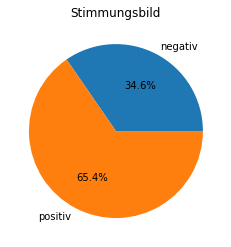

In [87]:
vf.plot_pie([negative_count, positive_count], labels=labels)

#### 3.1.4 Features

Jetzt fehlt nur noch eine Eingabe für unseren überwachten Klassifikator. Da diese auf Features und Labels angewiesen ist, strukturieren wir sie als einfaches Schlüsselwertpaar mit den Wörtern als Schlüssel und der Stimmung als Wert.

In [88]:
def get_features(tweets):
    for tweet in tweets:
        yield dict([(word, True) for word in tweet])

In [89]:
negative_features = get_features(tweets.loc[tweets['Label'] == 'negativ']['Token'])
negative_set = [(tweet_dict, 'negativ') for tweet_dict in negative_features]

positive_features = get_features(tweets.loc[tweets['Label'] == 'positiv']['Token'])
positive_set = [(tweet_dict, 'positiv') for tweet_dict in positive_features]

train_set = negative_set + positive_set
del negative_set, positive_set

### 3.2 Textdaten klassifizieren

#### 3.2.1 Überwachte Klassifikation

Mithilfe des [Naive Bayes](https://www.nltk.org/_modules/nltk/classify/naivebayes.html) Algorithmus führen wir eine überwachte Klassifizierung aus. Dabei versucht der Klassifikator eine Gruppe von Features ihrer wahrscheinlichsten Klasse (hier: Stimmung) zuzuordnen. In unserem Fall repräsentiert jedes Wort im Tweet ein Feature, wonach ein Feature-Set alle Wörter eines Tweets beinhaltet. In der folgenden Animation wird der Lernprozess des Klassifikators auf Basis von drei Klassen veranschaulicht:

![Naive Bayes](https://upload.wikimedia.org/wikipedia/commons/b/b4/Naive_Bayes_Classifier.gif)

In [90]:
from nltk import NaiveBayesClassifier, classify

Im Folgenden wird unser `nbclassifier` Klassifikator mithilfe von NLTK erzeugt und trainiert.

In [91]:
nbclassifier = NaiveBayesClassifier.train(train_set)

**Aufgabe: Wie lautet das informativste Wort des `nbclassifier` Klassifikators?**

In [92]:
#hideInput
texte_lm.show_task(321)

Output()

Output()

Output()

In [93]:
#solution
nbclassifier.show_most_informative_features()

Most Informative Features
              gefährlich = True           negati : positi =    223.6 : 1.0
                  gefahr = True           negati : positi =    199.2 : 1.0
                gefahren = True           negati : positi =    184.6 : 1.0
                 falsche = True           negati : positi =    173.2 : 1.0
              schlechter = True           negati : positi =    138.0 : 1.0
                  kriege = True           negati : positi =    114.0 : 1.0
                  falsch = True           negati : positi =     99.2 : 1.0
                 schaden = True           negati : positi =     97.1 : 1.0
                schlecht = True           negati : positi =     93.9 : 1.0
                  gewalt = True           negati : positi =     86.6 : 1.0


**Aufgabe: Wie gut schlägt sich der `nbclassifier` Klassifikator auf den Trainingsdaten?**

In [94]:
#hideInput
texte_lm.show_task(322)

Output()

Output()

Output()

In [95]:
#solution
classify.accuracy(nbclassifier, train_set)

0.8135504797332547

#### 3.2.2 Unüberwachte Klassifikation

Mithilfe von [K-means](https://www.nltk.org/_modules/nltk/cluster/kmeans.html) Clustering führen wir eine unüberwachte Klassifizierung aus. Dabei versucht der Klassifikator ähnliche Vektoren zu einem Cluster (hier: Stimmungen) zu gruppieren. In unserem Fall repräsentiert jedes Wort eines Tweets eine Dimension des Vektors, wonach alle Wörter eines Tweets einen n-dimensionalen Spaltenvektor bilden. In der folgenden Animation wird der Lernprozess des Klassifikators auf Basis von drei Clustern veranschaulicht:

![K-means](https://camo.githubusercontent.com/77a842161f9588166625169d1f0944e838837f19b105d7e55d235652cfcc3786/68747470733a2f2f692e696d6775722e636f6d2f6b3458636170492e676966)

Natürlich werden nicht immer gleich viele Wörter pro Tweet im Vokabular gefunden. Da unser unüberwachter Klassifikator eine konstante Eingabe benötigt, müssen wir uns auf eine Wortzahl einigen, die vom Modell pro Tweet einbezogen wird. Naheliegend entscheiden wir uns für die im Mittel gefundenen Wörter als `pad_size` und verdoppeln diese.

In [96]:
pad_size = int(np.round(np.mean([len(vector) for vector in tweets['Vector']])))
pad_size *= 2
pad_size

4

Fehlende Werte werden mit der `padding()` Funktion wie folgt aufgefüllt.

In [97]:
def padding(tweet): # Execution time too long
    """Pad vectors with zeros at the end."""
       
    return np.pad(tweet[:pad_size], (0, pad_size-len(tweet[:pad_size])))

In [98]:
tweets['Vector'] = tweets['Vector'].apply(padding)

In [99]:
from nltk.cluster import KMeansClusterer, euclidean_distance

Im Folgenden wird unser unüberwachter `kmclusterer` Klassifikator mithilfe von NLTK erzeugt und trainiert.

In [100]:
kmclusterer = KMeansClusterer(2, euclidean_distance, repeats=10, avoid_empty_clusters=True)

In [101]:
clusters = kmclusterer.cluster(tweets['Vector'], True)

**Aufgabe: Hinter welcher Funktion verstecken sich die Zentren unseres `kmclusterer` Klassifikators?**

In [102]:
#hideInput
texte_lm.show_task(323)

Output()

Output()

Output()

In [103]:
#solution
means = kmclusterer.means()

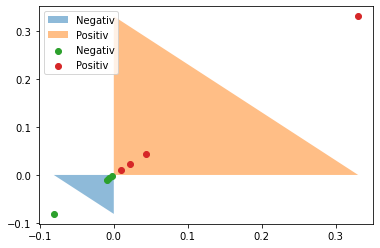

In [104]:
vf.plot_clusters(means)

<div style="background-color: #150458; padding: 5px;"></div>

## 4. Verwendung

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

In der Verwendungsdomäne werden zum Abschluss die Stimmung eigener Tweets vorhergesagt.

Welche Schritte ein Tweet innerhalb der Verwendung durchläuft verdeutlicht die folgende Abbildung:

![Model](./img/usage_flow.png)

### 4.1 Textdaten vorhersagen

Exemplarisch wird ein frei erfundener negativer Tweet betrachtet:

> Was für ein schlechtes Lernmodul

In [105]:
negative = "Was für ein schlechtes Lernmodul"

Ebenfalls wird ein positives Beispiel betrachtet:

> Was für ein gutes Lernmodul

In [106]:
positive = "Was für ein gutes Lernmodul"

Im produktiven Einsatz müssten diese Beispiele ebenfalls die Datendomäne durchlaufen, was wir uns in diesem Fall ersparen.

Zuletzt werden 100 zufällige Tweets aus dem Datensatz vorhergesagt.

In [107]:
train_sample = tweets.sample(100) # 100 random tweets

#### 4.1.1 Überwachter Klassifikator

[Zurück zur überwachten Klassifikation](#3.2.1-Überwachte-Klassifikation)

Welche Stimmung drückt unser negatives Beispiel nach Vorhersage der überwachten Klassifizierung aus?

In [108]:
nbclassifier.classify(mf.get_features_for_single_tweet(negative.split()))

'negativ'

Welche Stimmung drückt unser positives Beispiel nach Vorhersage der überwachten Klassifizierung aus?

In [109]:
nbclassifier.classify(mf.get_features_for_single_tweet(positive.split()))

'positiv'

Wie schlägt sich unser überwachter Klassifikator im Detail? Dafür klassifizieren wir beispielhaft 100 Tweets über die `supervised_classifier()` Funktion.

#	Soll	Ist	∆	Tweet
3285	positiv	positiv	 	Hände waschen und Mundschutz schön und gut, aber was können wir WIRKLICH gegen TikTok Videos tun?
37822	positiv	negativ	X	@Fantastrigger @MiataMuc Ja weil man glaubt dass beleidgende Äußerungen im Internet zu anschlägen fü
18675	positiv	negativ	X	Dies sind türkische Soldaten, die gefallenen syrischen Soldaten die Köpfe abschneiden #Syria : das L
12100	positiv	positiv	 	Heute Bezirkskonferenz der @JusosNdbayern im schönen Deggendorf! Freu mich schon - sie tagen übrigen
19117	positiv	negativ	X	😂😂 Unfassbar Sinnvolle Maßnahme Herr Spahn 👍👍
11207	negativ	negativ	 	#Merkel die Menschen fragen sich, wo die BK ist? Vermisst sie einer wirklich? Ich nicht. Wenn sie wi
68383	positiv	negativ	X	@Djdeutschland @DietmarBartsch Die Masken, an denen es mangelt sind FFP3-Masken. Die herzustellen be
63192	positiv	positiv	 	@fuckingmajarino ne privat ist besser i think mache meinen Main auch bald auf privat i guess
10654	positiv	positiv	 	Ich wusste es lohnt sich

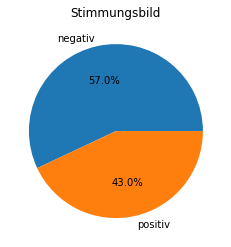

In [114]:
mf.supervised_classifier(train_sample, tweets_copy, nbclassifier, labels) # On Train

#### Unüberwachter Klassifikator

[Zurück zur unüberwachten Klassifikation](#3.2.2-Unüberwachte-Klassifikation)

Welche Stimmung drückt unser negatives Beispiel nach Vorhersage der unüberwachten Klassifizierung aus?

In [116]:
labels[kmclusterer.classify(padding(vectorize((negative.split()))))]

'negativ'

Welche Stimmung drückt unser positives Beispiel nach Vorhersage der unüberwachten Klassifizierung aus?

In [115]:
labels[kmclusterer.classify(padding(vectorize((positive.split()))))]

'positiv'

Wie schlägt sich unser unüberwachter Klassifikator im Detail? Dafür klassifizieren 100 zufällig ausgewählte Tweets über die `unsupervised_classifier()` Funktion.

#	Soll	Ist	∆	Tweet
3285	positiv	negativ	X	Hände waschen und Mundschutz schön und gut, aber was können wir WIRKLICH gegen TikTok Videos tun?
37822	positiv	negativ	X	@Fantastrigger @MiataMuc Ja weil man glaubt dass beleidgende Äußerungen im Internet zu anschlägen fü
18675	positiv	negativ	X	Dies sind türkische Soldaten, die gefallenen syrischen Soldaten die Köpfe abschneiden #Syria : das L
12100	positiv	negativ	X	Heute Bezirkskonferenz der @JusosNdbayern im schönen Deggendorf! Freu mich schon - sie tagen übrigen
19117	positiv	negativ	X	😂😂 Unfassbar Sinnvolle Maßnahme Herr Spahn 👍👍
11207	negativ	negativ	 	#Merkel die Menschen fragen sich, wo die BK ist? Vermisst sie einer wirklich? Ich nicht. Wenn sie wi
68383	positiv	negativ	X	@Djdeutschland @DietmarBartsch Die Masken, an denen es mangelt sind FFP3-Masken. Die herzustellen be
63192	positiv	negativ	X	@fuckingmajarino ne privat ist besser i think mache meinen Main auch bald auf privat i guess
10654	positiv	negativ	X	Ich wusste es lohnt sich

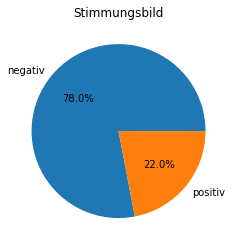

In [117]:
mf.unsupervised_classifier(train_sample, tweets_copy, kmclusterer, labels) # On Train

<div style="background-color: #150458; padding: 5px;"></div>

## 5. Abschluss

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

Zum Abschluss des Lernmoduls folgen einige Verständnisfragen, bevor deine Gesamtpunktzahl errechnet wird...

**Aufgabe: Welche Eingabe benötigt der überwachte `nbclassifier` Klassifikator?**

In [118]:
texte_lm.show_task(501)

Output()

Output()

Output()

**Aufgabe: Welche Eingabe benötigt der unüberwachte `kmclusterer` Klassifikator?**

In [119]:
texte_lm.show_task(502)

Output()

Output()

Output()

**Ergebnis:**

Du hast folgende Punktzahl erreicht...

In [120]:
texte_lm.get_score()

0.0

**Zusammenfassung:**

Das vergangene Lernmodul hat einen Einblick in die Texterkennung als Teilgebiet des _NLP_ gegeben. Im Zuge einer Stimmungsanalyse von aktuellen Beiträgen auf Twitter, haben wir zunächst Rohdaten beschafft und erkundet. Irrelevante Inhalte wurden auf Basis von Sonderzeichen, URL-Schema und der Länge des resultierenden Beitrags, identifiziert und verworfen, sodass die Rohdaten als nächstes in ein Modell eingebettet wurden. Dieses Modell klassifizierte die Daten entweder überwacht oder unüberwacht, was verschiedene Einbettungsschritte hervorrief. Letztendlich konnte sowohl der überwachte als auch der unüberwachte Klassifikator die Stimmung eines Tweets einschätzen und vorhersagen.

**Glossar:**

* NLP (Natural Language Processing)
    * Verarbeitung menschlicher Sprache
* NLTK (Natural Language ToolKit)
    * Python-Bibliothek für die Verarbeitung menschlicher Sprache

**Weiterführende Lernmodule:**

- [Lernmodul zu Datamining mit Scikit Learn](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-scikit)

**Weiterführende Inhalte:**

* Leitfäden
    * [Cookbook by NLTK](https://www.nltk.org/book/)
    * [Recurrent neural networks by TensorFlow](https://www.tensorflow.org/guide/keras/rnn?hl=en)
    * [Text classification by Google Developers](https://developers.google.com/machine-learning/guides/text-classification)
* Vektorisierung
    * [TextBlob](https://textblob.readthedocs.io/en/dev/)
    * [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html)
* Tutorials
    * [Basic text classification by TensorFlow](https://www.tensorflow.org/tutorials/keras/text_classification?hl=en)

**Referenzen:**

<a id="1">[1]</a> Nane Kratzke. (2020). Monthly Samples of German Tweets (Version 2020-04) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.3783478

<a id="2">[2]</a> R. Remus, U. Quasthoff & G. Heyer: SentiWS - a Publicly Available German-language Resource for Sentiment Analysis. In: Proceedings of the 7th International Language Resources and Evaluation (LREC'10), pp. 1168-1171, 2010